* 아래 실습을 위한 파일은 eTL에서 다운받을 수 있습니다.  

  * `covid19_seoul.csv` 서울 열린데이터 광장에서 다운로드 받은 파일로, 서울시 기준의 코로나19 확진자 관련 정보를 확인할 수 있습니다.  

  * `environment1.csv`와 `environment2.csv`는 공공 데이터 포털(data.go.kr)에서 다운로드 받은 파일를 분할한 것으로, 도로 재비산먼지 측정 정보를 확인할 수 있습니다.  
    * 설명) 한국환경공단_도로 재비산먼지 측정 정보는 특수제작한 이동측정차량으로 주행하는 차량의 타이어(휠)와 도로면의 마찰에 의해서 재비산되는 먼지(PM10)를 측정한 월간 평균 자료입니다.  
    * 주의) 데이터의 결측치는 실습을 위해서 임의로 비워둔 값입니다.


**수업에 필요한 모듈을 임포트하여라.**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
path = r"/content/drive/MyDrive/Colab Notebooks/0317/seoul_covid19.csv"

실습에 앞서, `matplotlib` 패키지의 글꼴을 한글 표시가 가능하도록 한글을 지원하는 글꼴로 바꿔준다. 혹시 한글 표시에 오류가 발생한다면 상단 메뉴에서 [런타임]>[런타임 다시 시작] 또는 [다시 시작 및 모두 실행] 을 눌러 런타임을 재시작하면 된다.  

In [15]:
!apt install -y fonts-nanum
!fc-cache -fv

applyfont = "NanumBarunGothic"

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
  fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

한글이 잘 표시되는지 아래 코드를 실행시켜서 확인해보면 좋다. 한글이 정상적으로 나온다면 잘 적용된 것이다.

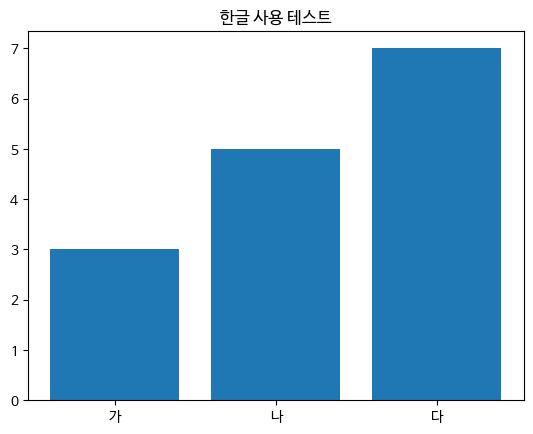

In [46]:
dat = pd.Series({'가': 3, '나': 5, '다': 7})

plt.bar(dat.index, dat)
plt.title("한글 사용 테스트")
plt.show()

**문제1) 아래의 질문에 답하여라.**

1) `covid19_seoul.csv` 파일을 읽어 데이터프레임 `df_covid`를 만들어라.

In [47]:
df_covid = pd.read_csv(path)
df_covid

<ipython-input-47-4866c6ea1dc7>:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid = pd.read_csv(path)


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


2) `df_covid`의 열(column)에는 어떠한 것이 있는가? 열의 개수는 몇 개인가?

In [48]:
df_covid.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [49]:
len(df_covid.columns)

14

연번, 확진일 등의 정보를 담은 열(column)이 존재하고, 총 개수는 14개이다.

참고: 사람에게 보기 좋게 정보를 출력해주는 `info()`라는 메소드를 제공하고 있다. 해당 메소드를 이용하면 전체적인 정보를 빠르게 확인할 수 있다.

In [50]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182558 entries, 0 to 182557
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연번      182558 non-null  int64  
 1   확진일     182558 non-null  object 
 2   환자번호    42279 non-null   float64
 3   국적      0 non-null       float64
 4   환자정보    42279 non-null   object 
 5   지역      182558 non-null  object 
 6   여행력     2072 non-null    object 
 7   접촉력     182558 non-null  object 
 8   조치사항    0 non-null       float64
 9   상태      182558 non-null  object 
 10  이동경로    50000 non-null   object 
 11  등록일     182558 non-null  object 
 12  수정일     182558 non-null  object 
 13  노출여부    182558 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 19.5+ MB


3) `df_covid`에는 몇 개의 관측치가 있는가?

데이터프레임에서 관측치의 개수, 즉, 행의 개수는 `len()`  함수를 통해 구할 수 있다.

In [51]:
len(df_covid)

182558

4) 가장 많은 확진자가 나온 날은 언제인가? 그때의 확진자 수는 몇 명인가?

먼저, 각 날짜별 확진자수를 구하기 위하여 `value_counts()` 메소드를 사용한다.


In [52]:
covid_per_day = df_covid["확진일"].value_counts()
covid_per_day

,count
확진일,
2021-12-07,2901
2021-12-10,2835
2021-12-09,2800
2021-12-08,2790
2021-12-11,2528
...,...
2020-02-02,1
2020-04-30,1
2020-04-19,1


방법 1: 내림차순 정렬 후 `head()` 메소드를 통해 가장 상위에 나타난 행을 확인

In [53]:
covid_per_day.sort_values(ascending=False).head()

,count
확진일,
2021-12-07,2901
2021-12-10,2835
2021-12-09,2800
2021-12-08,2790
2021-12-11,2528


방법 2: `max()` 메소드를 이용한 후 해당 행을 찾는 방법

In [54]:
covid_per_day[covid_per_day == covid_per_day.max()]

,count
확진일,
2021-12-07,2901


5) 일별 확진자수를 선 그래프로 시각화하여라.

시간 순으로 보기 위해서 시리즈의 인덱스인 날짜로 정렬한다. 이를 위해 `sort_index()` 메소드를 이용한다.

In [55]:
covid_per_day = covid_per_day.sort_index()
covid_per_day

,count
확진일,
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2021-12-07,2901
2021-12-08,2790
2021-12-09,2800


`matplotlib.pyplot` 모듈에서 `plt()` 함수를 이용하면 꺾은선 그래프를 그릴 수 있다.

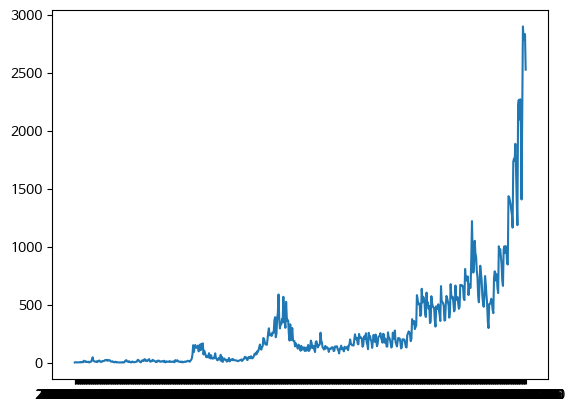

In [60]:
plt.plot(covid_per_day)
plt.show()

참고: 아래와 같이 여러 정보를 같이 넣어주면 시각적으로 좋다.

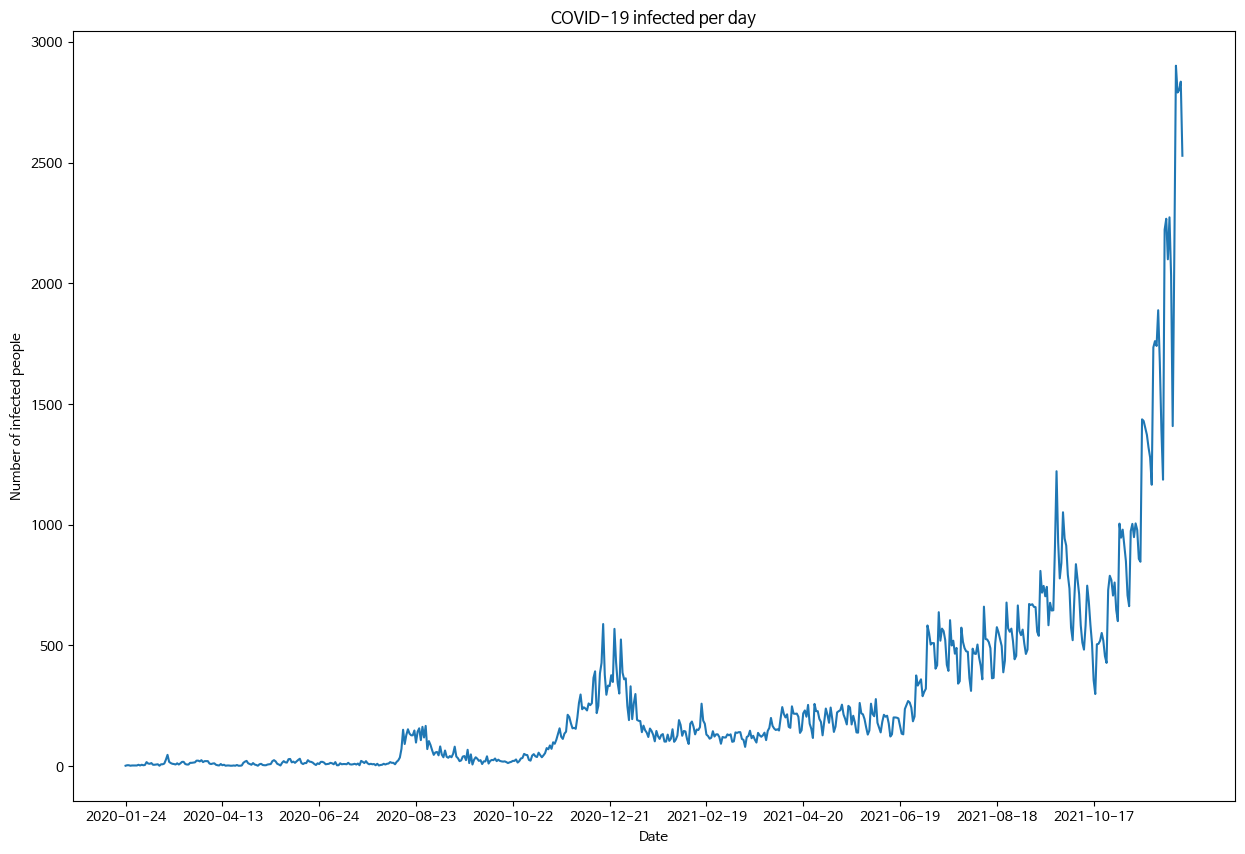

In [64]:
plt.figure(figsize=(15, 10))
plt.plot(covid_per_day)

plt.title("COVID-19 infected per day")
plt.xlabel("Date")
plt.ylabel("Number of infected people")
plt.xticks(covid_per_day.index[::60])

plt.show()

6) 지역별 확진자 수를 막대 그래프로 시각화하여라. 단, 관악구는 다른 색으로 표시하여, 잘 보이도록 한다.

먼저, 지역별 확진자수를 구한다.

In [28]:
covid_per_area = df_covid["지역"].value_counts()
covid_per_area

,count
지역,
송파구,10905
강남구,10358
관악구,9296
타시도,9057
구로구,8932
영등포구,8775
강서구,8376
은평구,7721
노원구,7535


그 후, `plt.bar()` 메소드를 이용해 막대그래프를 그려준다.

<BarContainer object of 35 artists>

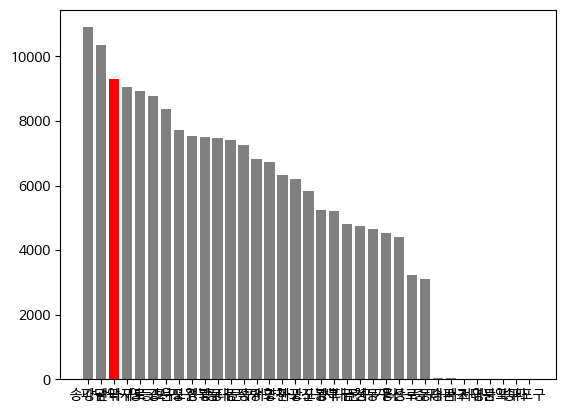

In [29]:
colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

plt.bar(covid_per_area.index, covid_per_area, color=colors)

아래와 같이 정보를 더 표시하고 사이즈를 키우면 시각적으로 좋다.

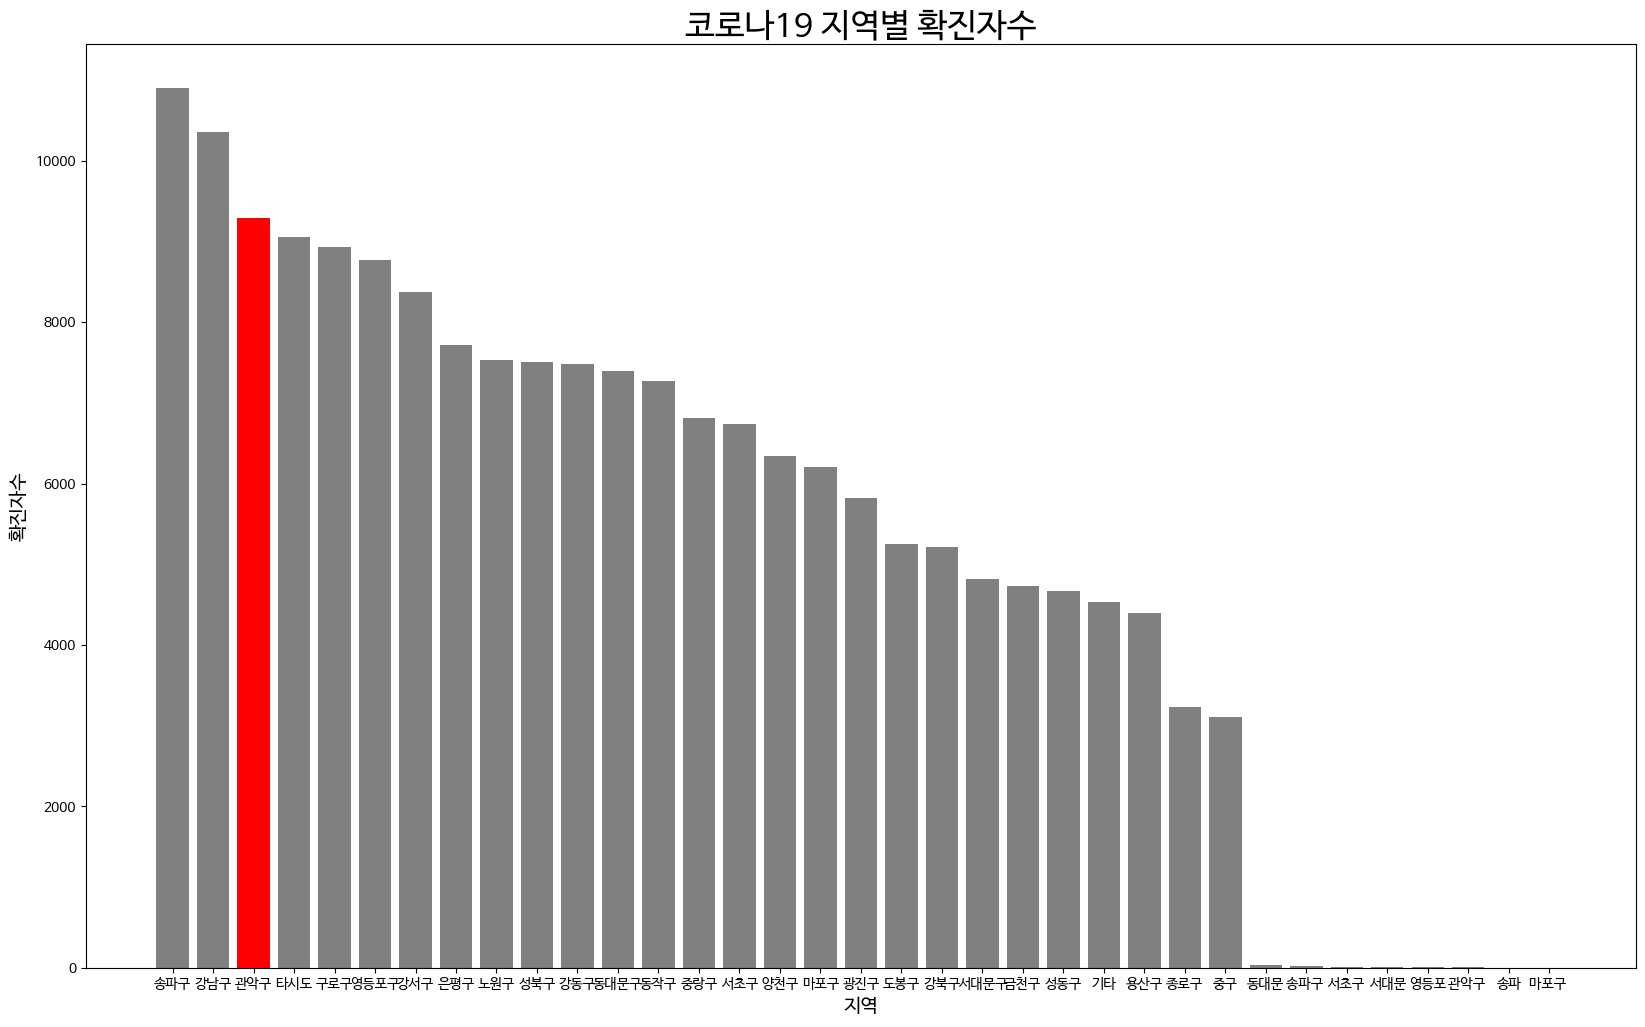

In [30]:
fig = plt.figure(figsize=(20, 12)) #figsize로 그래프의 크기 변경 가능

colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

plt.bar(covid_per_area.index, covid_per_area, color=colors)

plt.title("코로나19 지역별 확진자수", fontsize=24)
plt.xlabel("지역", fontsize=14)
plt.ylabel("확진자수", fontsize=14)

plt.show()

**문제2) 아래의 질문에 답하여라.**

1) `environment1.csv`와 `environment2.csv` 파일을 읽어 데이터프레임 `df1`과 `df2`를 만들어라.

In [42]:
df1 = pd.read_csv()
df1

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/0317/environment1.csv'

In [ ]:
df2 = pd.read_csv("environment2.csv")
df2

2) `df1`과 `df2`의 처음 10개와 끝 10개의 행을 확인하여라.

`head()`와 `tail()` 메소드를 이용하며, 10개의 행을 표시하기 위하여 인자로 숫자 `10`을 준다.

In [ ]:
df1.head(10)

In [ ]:
df1.tail(10)

In [ ]:
df2.head(10)

In [ ]:
df2.tail(10)

3) `df1`과 `df2`에는 각각 몇 개의 관측치가 있는가?

아래와 같이 `df1`에는 500개, `df2`에는 824개의 관측치가 존재한다.

In [ ]:
len(df1)

In [ ]:
len(df2)

4) `df1`과 `df2`를 합하여 데이터프레임 `df`를 만들어라.

데이터프레임을 합치기 위하여 판다스 `concat()` 함수를 이용하면 된다. 이 때, 인덱스 재배열을 위해 `ignore_index=True`를 인자로 주었다.

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df

5) `df`의 각 열에는 몇 개의 결측치가 있는가?

데이터프레임의 결측치의 개수를 세기 위하여 `isnull()` 메소드와 `sum()` 메소드를 이용한다.

In [ ]:
df.isnull().sum()

6) `df`의 각 열의 결측치를 각 열의 평균으로 대체하여라.

결측치가 제대로 대체되었는지 확인하기 위하여 값 대입 전의 데이터프레임을 `df_old` 변수에 저장하였다.

In [ ]:
df_old = df

In [ ]:
df_old

`fillna()` 메소드를 이용하여 결측치의 대체값을 넣어줄 수 있다. 이 때, 각 열 별로 대체값을 다르게 하기 위하여 `value` 인자를 사용하며 그 값으로는 `mean()` 메소드를 사용하여 각 열의 평균을 구하여 넣어주면 된다.

In [ ]:
df = df.fillna(value=df.mean())
df

아래와 같이 결측치가 존재하는 기온과 습도 열에서 결측치가 존재했던 행을 조회해보면 정상적으로 대체값이 대입되었음을 알 수 있다.

In [ ]:
df[df_old["습도 (%)"].isnull()]

In [ ]:
df[df_old["기온 (℃)"].isnull()]

아래와 같이 코드를 작성할 수도 있다.

In [ ]:
df = df.fillna(df.mean())
df

딕셔너리로 만들어 볼 수도 있다.

In [ ]:
values = {'기온 (℃)' : df['기온 (℃)'].mean(), '습도 (%)' : df['습도 (%)'].mean()}
values

In [ ]:
df = df.fillna(value = values)
df

7) `df`에 있는 서울시 데이터로 기온과 습도의 산점도를 그려라. 이때, 각 점의 크기는 재비산먼지에 따라 다르게 한다.

산점도는 `plt.scatter()` 함수로 그릴 수 있다. 여기서 점의 크기가 너무 커져서 `20`으로 나누어주었다.

In [ ]:
col_x = "기온 (℃)"
col_y = "습도 (%)"
col_size = "재비산먼지 평균농도(㎍/㎥)"

plt.scatter(df[col_x], df[col_y], s=df[col_size] / 20)
plt.show()

이 그래프 또한 정보를 더 표시할 수 있다.

In [ ]:
col_x = "기온 (℃)"
col_y = "습도 (%)"
col_size = "재비산먼지 평균농도(㎍/㎥)"

plt.scatter(df[col_x], df[col_y], s=df[col_size] / 20)
plt.title("기온과 습도, 그리고 재비산먼지의 관계")
plt.xlabel(col_x)
plt.ylabel(col_y)

plt.show()

연습을 더 하고 싶다면, 아래의 문제를 풀어보세요!  

**[추가문제1] 아래의 질문에 답하여라.**

1) 원 그래프를 그려라.     
* 문제1)에서 만든 데이터프레임 `df_covid`을 이용한다.
* 관악구와 관악구가 아닌 지역으로만 구분한다.
* 관악구 조각은 돌출되게 만들고, 다른 색으로 표시하여 잘 보이도록 한다.


`df_covid`의 정보를 이용하여 지역별 확진자수를 원 그래프로 그려보도록 한다.  
  
관악구 지역만 다른 색깔과 돌출된 특징을 부여하기 위하여 두개의 시리즈를 만들고, 관악구 지역만 특별히 다른 값을 부여하여 사용한다. 색깔은 `colors` 인자에, 돌출값은 `explode` 인자를 통해 전달되었다.

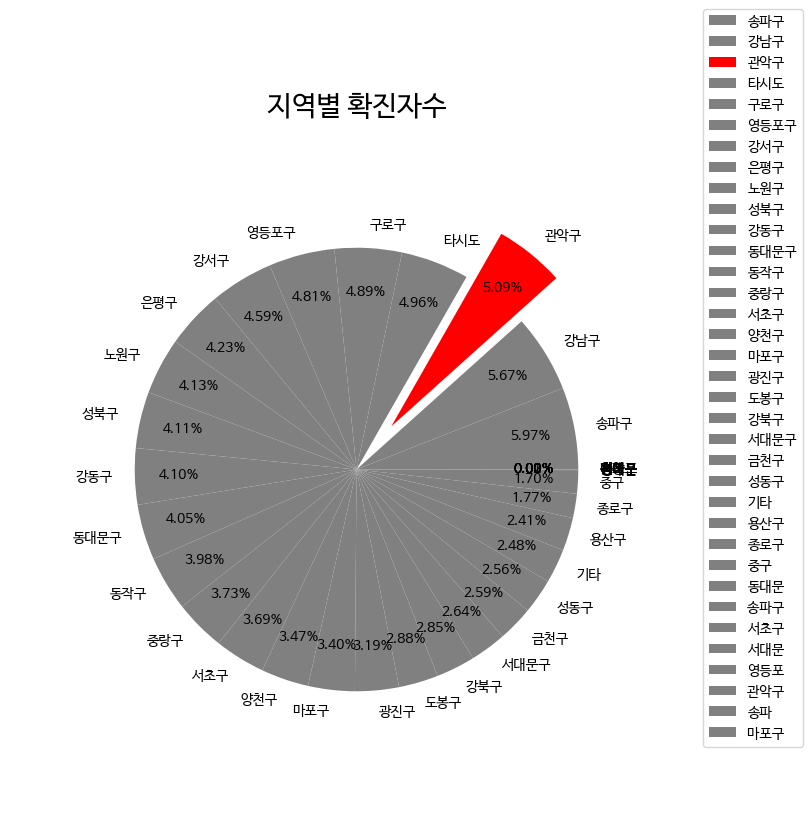

In [32]:
covid_per_area = df_covid["지역"].value_counts()

fig = plt.figure(figsize=(16, 9))

# 색깔
colors = pd.Series("gray", index=covid_per_area.index)
colors["관악구"] = "red"

# 돌출
explode = pd.Series(0.0, index=covid_per_area.index)
explode["관악구"] = 0.2

plt.pie(covid_per_area, labels=covid_per_area.index,
        autopct = '%.2f%%', pctdistance=0.8,
        colors=colors, explode=explode, radius=0.8)

plt.title("지역별 확진자수", fontsize=20)
plt.legend(covid_per_area.index, loc=(1, 0.1))

plt.show()

**[추가문제2] 아래의 질문에 답하여라.**

`seaborn` 모듈은 파이썬 데이터 시각화 모듈로, 그래프를 그리는 연습을 할 수 있도록 여러 데이터셋도 제공한다. `iris`에는 붓꽃 유형과 꽃잎과 꽃받침의 길이와 너비 정보가 담겨져 있다.   

1) 아래의 코드를 사용하여, 데이터프레임 `iris`를 만들어라.   
(여기서는 아래의 코드를 복사하여 붙여넣기 하면 된다.)

```
import seaborn as sns
iris = sns.load_dataset('iris')  #iris을 가져오는 코드
```


In [33]:
import seaborn as sns
iris = sns.load_dataset('iris')  #iris을 가져오는 코드

In [34]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2) 붓꽃 유형은 `iris`의 `species`열에 저장되어 있다. `species`열에 있는 유일한 값과 개수를 확인하여라.  

`value_counts()` 메소드를 이용하면 유일한 값과 개수를 한번에 확인할 수 있다.

In [35]:
iris["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


참고: `unique()` 메소드를 이용하면 유일한 값의 배열을 얻을 수 있다.

In [36]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

3) 꽃잎 길이(petal_length)와 꽃잎 너비(petal_width)의 산점도를 그려라.  

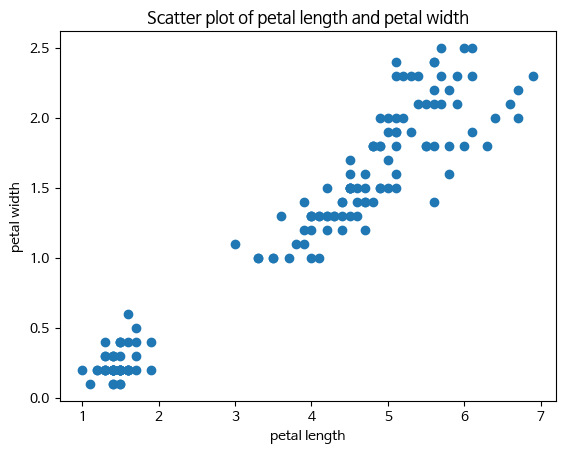

In [37]:
plt.scatter(iris["petal_length"], iris["petal_width"])

plt.title("Scatter plot of petal length and petal width")
plt.xlabel("petal length")
plt.ylabel("petal width")

plt.show()

4) 위의 3) 산점도에서 꽃 유형(species)이 다르면, 다른 색으로 표시되도록 하여라. 이때 범례(legend)도 표시되게 한다.

서로 다른 색깔로 표시되도록 그룹으로 나누어주는 `groupby()` 메소드를 사용한 후 for문을 통해 각 경우에 대해 처리해준다. 색깔은 `colors` 리스트에 담겨 있는 순서대로 사용되며, `color` 인자를 통해 넘겨준다. 또한, 범례에 사용될 이름은 `label` 인자를 통해 넘겨준다.  
  
참고: `(name, df_group)`과 같이 따로 괄호를 통해 묶여있는 부분은 괄호 안의 변수에 대한 값이 첫번째 인자를 풀어서 받음을 의미한다.

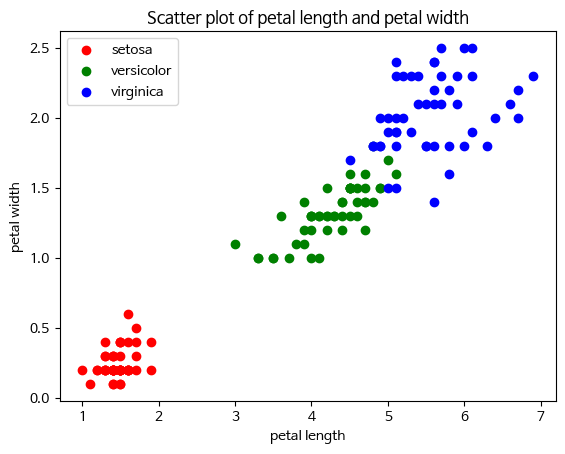

In [38]:
colors = ["red", "green", "blue"]

for (name, df_group), color in zip(iris.groupby("species"), colors):
  plt.scatter(df_group["petal_length"], df_group["petal_width"], color=color, label=name)

plt.title("Scatter plot of petal length and petal width")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

plt.show()